In [1]:
import numpy as np
import torch
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt

In [2]:
n_samples = 10_000
data, _ = make_swiss_roll(n_samples)
data = data[:, [2, 0]] / 10
data = data * np.array([1, -1])

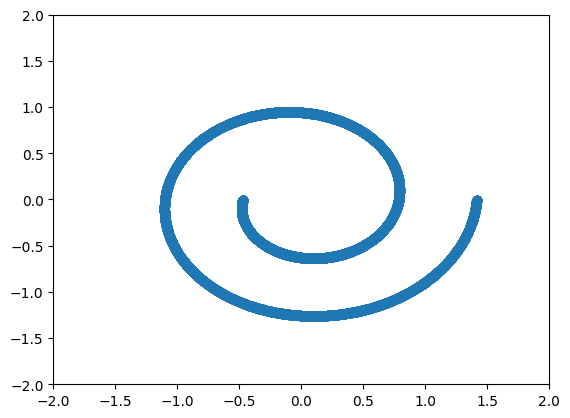

In [3]:
plt.scatter(data[:, 0], data[:, 1])
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()

q(x_t | x_{t-1}) = N(x_t; x_{t-1} * sqrt(1 - beta_t), I.beta_t)

Here, the mean is square root of 1-beta_t multiplied by data in previous time step.
The variance is Identity matrix * beta_t

In [4]:
def forward_process(data, T, betas):
  for t in range(T):
    # We need to sample x_t given x_{t-1}.
    # mean = x_{t-1} * sqrt(1-beta_t)
    # var = Identity_matrix * beta_t
    beta_t = betas[t]
    mu = data * torch.sqrt(1-beta_t)
    std = torch.sqrt(beta_t)
    # Sample from q(x_t | x_{t-1})
    data = mu + std * torch.randn_like(data)  # sampling data ~ N(mu, std)
  return data

In [5]:
T = 40
betas = torch.sigmoid(torch.linspace(-18, 10, T)) * (3e-1 - 1e-5) + 1e-5
xT = forward_process(torch.from_numpy(data), T, betas)
print(xT)

tensor([[ 0.6756,  0.5234],
        [-0.0961, -0.1630],
        [ 0.1166, -0.0598],
        ...,
        [-0.4247,  1.5162],
        [ 0.1924, -0.2392],
        [-0.7435, -0.7610]], dtype=torch.float64)


In [6]:
print(xT.mean(0))   # Want mean close to 0
print(xT.std(0))    # Want std close to 1

tensor([ 0.0119, -0.0073], dtype=torch.float64)
tensor([0.9826, 0.9994], dtype=torch.float64)


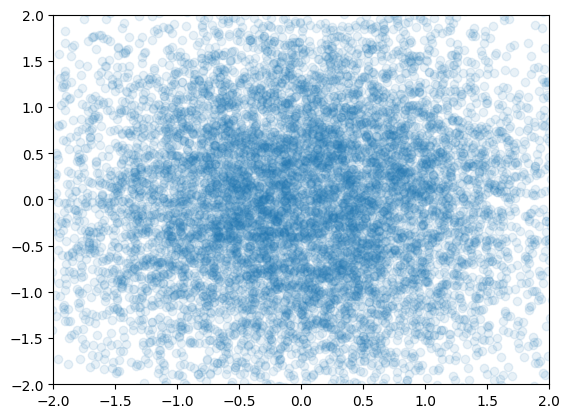

In [7]:
plt.scatter(xT[:, 0], xT[:, 1], alpha=0.1)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()